In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import functools
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dense,Dropout,Input,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

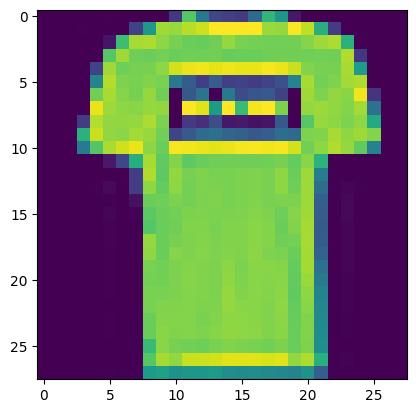

In [8]:
plt.imshow(x_train[1])
plt.show()

In [9]:
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
x_train.shape

(60000, 28, 28)

#### I'll just scale the inputs first and add an additional axis for channel

In [11]:
scale_x_train=x_train/255.
scale_x_test=x_test/255.
scale_x_train=scale_x_train[...,np.newaxis]
scale_x_test=scale_x_test[...,np.newaxis]

##### I tried a single convolutional layer but it wasn't enough to capture the complexity of Fashion-MNIST images. 
##### Therefore, I used two Conv2D layers to learn better features (maybe shapes,edges), each with 3×3 kernels and
##### 2×2 max pooling for controlled downsampling. Batch Normalization is applied to stabilize training. The dense 
##### layers reduce dimensionality (256 → 64) slowly to avoid a suddent jump and bottleneck, Also Dropout is used to avoid 
##### overfitting.


In [13]:
model=Sequential([
                Conv2D(64, (3,3), padding="same", activation="relu", input_shape=(28,28,1)),
                BatchNormalization(),
                MaxPooling2D((2,2)),
                Conv2D(64, (3,3), padding="same", activation="relu"),
                BatchNormalization(),
                MaxPooling2D((2,2)),
                Flatten(),
                Dense(units=256,activation="relu"),
                Dropout(0.3),
                Dense(units=64,activation="relu"),
                Dropout(0.2),
                Dense(units=10,activation="softmax"),
])

In [14]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

##### I also augmented some data as before that it was saturating at 85-86% accuracy without augmentation
##### But for more boost I added some augmentation

In [33]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
details = model.fit(datagen.flow(scale_x_train, y_train, batch_size=32),epochs=15,validation_data=(scale_x_test,y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9082 - loss: 0.2543 - val_accuracy: 0.8931 - val_loss: 0.2995
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9082 - loss: 0.2529 - val_accuracy: 0.8972 - val_loss: 0.2948
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9075 - loss: 0.2504 - val_accuracy: 0.9122 - val_loss: 0.2536
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9113 - loss: 0.2463 - val_accuracy: 0.9079 - val_loss: 0.2615
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9096 - loss: 0.2495 - val_accuracy: 0.9005 - val_loss: 0.2768
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9098 - loss: 0.2444 - val_accuracy: 0.9073 - val_loss: 0.2745
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9105 - loss: 0.2439 - val_accuracy: 0.9158 - val_loss: 0.2383
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9127 -

In [34]:
frame=pd.DataFrame(details.history)
frame

,accuracy,loss,val_accuracy,val_loss
0,0.908250,0.254250,0.8931,0.299495
1,0.908167,0.252946,0.8972,0.294834
2,0.907550,0.250434,0.9122,0.253638
3,0.911300,0.246271,0.9079,0.261548
4,0.909583,0.249517,0.9005,0.276764
5,0.909800,0.244384,0.9073,0.274455
6,0.910533,0.243937,0.9158,0.238347
7,0.912683,0.243734,0.8429,0.470183
8,0.911450,0.242790,0.9146,0.240500
9,0.911550,0.244274,0.9158,0.244707


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'loss')]

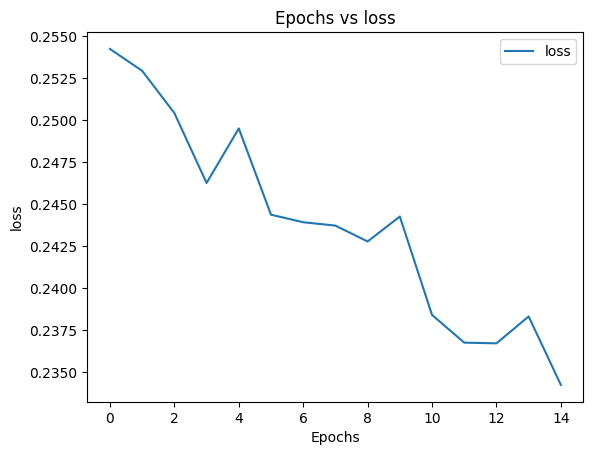

In [35]:
gra=frame.plot(y="loss",title="Epochs vs loss",)
gra.set(xlabel="Epochs",ylabel="loss")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'accuracy')]

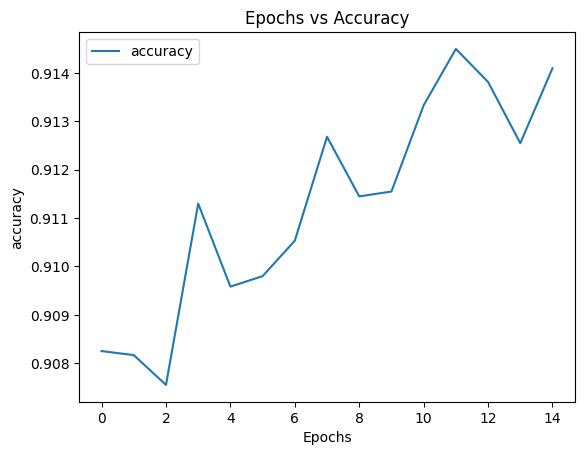

In [36]:
frame2=frame.plot(y="accuracy",title="Epochs vs Accuracy")
frame2.set(xlabel="Epochs",ylabel="accuracy")

In [37]:
model.evaluate(scale_x_test,y_test,batch_size=32,verbose=3)

[0.23929363489151, 0.9143000245094299]

## 91\% accuracy ?!?!

### That's Good man

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction - Dress
Answer : Dress


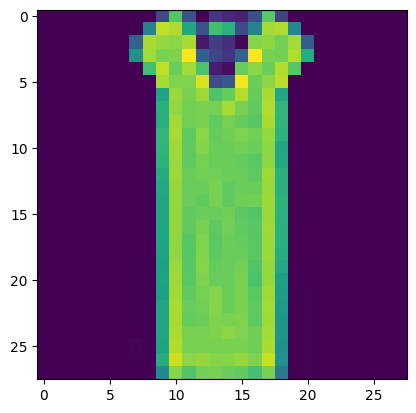

In [38]:
random_inx = np.random.choice(scale_x_test.shape[0])
test_image = scale_x_test[random_inx,:]
print(f"Prediction - {labels[np.argmax(model.predict(test_image[np.newaxis,...]))]}")
print(f"Answer : {labels[y_test[random_inx]]}")
plt.imshow(test_image)
plt.show()

### Good prediction